<a href="https://colab.research.google.com/github/HawonCP3/Class2022Spring/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

In [12]:
import nltk

In [4]:
# copy a file from github
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")

# read a text file in the server
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ")
file.close()

In [3]:
# or copy/pase text here
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [8]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()

In [ ]:
text.split()

In [10]:
' '.join(text.split())

'PART ONE CHAPTER ONE ON AN EXCEPTIONALLY HOT evening early in July a young man came out of the tiny room which he rented from tenants in S. Place and walked slowly, as though in hesitation, towards K. Bridge. He had successfully avoided meeting his landlady on the stairs. His closet of a room was under the roof of a high, five-floor house and was more like a cupboard than a place in which to live. The landlady who provided him with the room and with dinner and service lived on the floor below, and every time he went out he was obliged to pass her kitchen, the door of which was always open. And each time he passed, the young man had a sick, frightened feeling, which made him grimace and feel ashamed. He was hopelessly in debt to his landlady and was afraid of meeting her. This was not because he was cowardly and browbeaten, quite the contrary; but for some time past he had been in an overstrained irritable condition, verging on hypochondria. He had become so completely absorbed in hims

In [11]:
from nltk.tokenize import word_tokenize
nltk.download('punkt') # 더 정교하게 쪼개기, 그런데 큰 효과는 없음
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

In [ ]:
words

### Normalization  
**Stemming** 어간 추출 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

**Lemmatization** 표제어(기본 사전형) 추출.


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword
nltk에서 제공. 조동사, 대명사, 관사 등 관심이 없는 단어 리스트를 받아옴

In [18]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]  
# stopword에 들어있지 않은 단어를 취하라 -> stopword에 속한 단어 제외
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['PART', 'ONE', 'CHAPTER', 'ONE', 'ON', 'AN', 'EXCEPTIONALLY', 'HOT', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'tiny', 'room', 'which', 'he', 'rented', 'from', 'tenants', 'in', 'S', 'Place', 'and', 'walked', 'slowly', 'as', 'though', 'in', 'hesitation', 'towards', 'K', 'Bridge', 'He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'stairs', 'His', 'closet', 'of', 'a', 'room', 'was', 'under', 'the', 'roof', 'of', 'a', 'high', 'five', 'floor', 'house', 'and', 'was', 'more', 'like', 'a', 'cupboard', 'than', 'a', 'place', 'in', 'which', 'to', 'live', 'The', 'landlady', 'who', 'provided', 'him', 'with', 'the', 'room', 'and', 'with', 'dinner', 'and', 'service', 'lived', 'on', 'the', 'floor', 'below', 'and', 'every', 'time', 'he', 'went', 'out', 'he', 'was', 'obliged', 'to', 'pass', 'her', 'kitchen', 'the', 'door

### Collocation, Concordance
collocation - 연어, 연속해서 쓰이는 두 단어 출력

concordance - 단어가 포함된 문맥 출력


In [19]:
nltk.download('gutenberg') # gutenberg - 저작권 기간이 지난 classic text 모음집
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [22]:
type(text)

str

In [24]:
len(words)

161983

In [27]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2) -> 2개짜리만 됨

Mrs Weston; Frank Churchill; Miss Woodhouse; Jane Fairfax; Miss Bates;
Miss Fairfax; Mrs Elton; every thing; young man; every body; great
deal; Colonel Campbell; dare say; Mrs Goddard; Maple Grove; John
Knightley; Miss Smith; Miss Taylor; Robert Martin; Box Hill; half
hour; Upon word; William Larkins; Mrs Cole; Brunswick Square; Mrs
Bates; said Emma; Harriet Smith; young lady; body else; take care;
South End; Mrs Churchill; Abbey Mill; young woman; court plaister;
last night; drawing room; Every body; Miss Hawkins; could bear; depend
upon; barouche landau; Emma could; cried Emma; good deal; young
ladies; post office; sore throat; three months


In [26]:
nltk.Text(words).concordance('Emma', 79, 10)  # ('단어', 텍스트 위치, 문장 개수)

Displaying 10 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


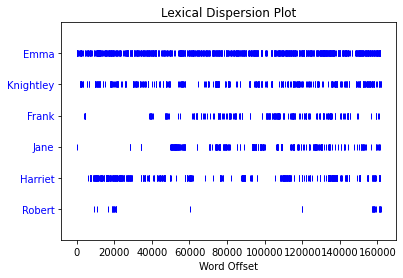

In [28]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
# 총 단어에서 "단어"가 차지하는 위치, 비중 표현

In [29]:
# Distributional similarity: 
# find other words which appear in the same contexts as the specified word;
# list most similar words first.
nltk.Text(words).similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [30]:
# Find contexts where the specified words appear; list most frequent common contexts first.
nltk.Text(words).common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


### Frequency distribution, Frequency plot

In [33]:
words = [w for w in words if not w in stopwords.words('english')]  
fd = nltk.FreqDist(words).most_common(20)
fd

[('I', 3178),
 ('Mr', 1153),
 ('Emma', 865),
 ('could', 825),
 ('would', 815),
 ('Mrs', 699),
 ('Miss', 592),
 ('must', 564),
 ('She', 562),
 ('Harriet', 506),
 ('said', 484),
 ('much', 478),
 ('He', 441),
 ('Weston', 439),
 ('one', 413),
 ('It', 400),
 ('every', 398),
 ('thing', 398),
 ('Knightley', 389),
 ('Elton', 385)]

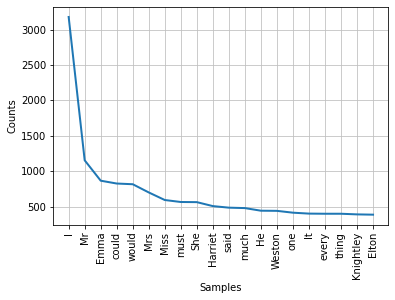

In [34]:
nltk.Text(words).plot(20)

### Dictionary

In [14]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [36]:
len(nltk.corpus.words.words('en'))

235886

### Extract information (pos tag, named entity)


#### **POS(Part of Speech) tag list**:

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [37]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [38]:
words

['I',
 'am',
 'Jhon',
 'from',
 'America',
 'and',
 'would',
 'like',
 'to',
 'go',
 'to',
 'Starbuck']

In [39]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words) # 품사 분류

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [40]:
pos

[('I', 'PRP'),
 ('am', 'VBP'),
 ('Jhon', 'RB'),
 ('from', 'IN'),
 ('America', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Starbuck', 'NNP')]

In [41]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


In [ ]:
NE

### Wordcloud
frequency를 기반으로 하나의 picture 생성

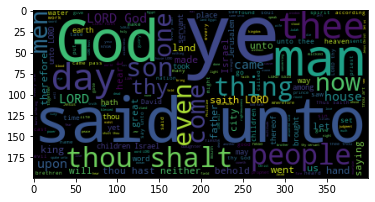

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

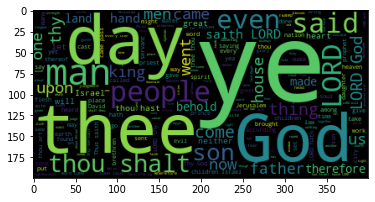

In [44]:
stopwords = set(STOPWORDS) 
stopwords.add('unto') # stopwords에 'unto' 추가
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)

### Regular expression

In [2]:
import re

In [3]:
re.search('a', 'abcdefa')

<re.Match object; span=(0, 1), match='a'>

In [10]:
re.search('ed$','educated')

<re.Match object; span=(6, 8), match='ed'>

In [47]:
re.findall('a', 'abcdefa') 

['a', 'a']

In [49]:
re.sub('a', 'b', 'abcdefa') # ('대체될것', '대체할것', '해당str')

'bbcdefb'

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [24]:
engdict = nltk.corpus.words.words('en')

# result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('tj$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

['a', 'aa', 'ah', 'aha', 'h', 'ha', 'hah']


In [37]:
nltk.download('treebank')  # 월 스트리트 저널에 나오는 단어 리스트
wsj = nltk.corpus.treebank.words()

# result = [w for w in wsj if re.search('(ed|ing|s)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)] # 소수점 있는 숫자 구하기, \ 써서 위 리스트 기호 포함된 단어 서치
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result)) # sort 작업 수행 
print(result[:10])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
['black-and-white', 'bread-and-butter', 'father-in-law', 'machine-gun-toting', 'savings-and-loan']


In [27]:
len(wsj)

100676

In [18]:
len(result)

481

In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/my/main/friends_season01_script.txt"
os.system("curl " + url + " > friends_season01_script.txt")

# read a text file in the server
file = open("friends_season01_script.txt")
text = file.read()
file.close()
text

In [ ]:
pattern = '(?<=: ).+(?=[\.|\?|\!])'
sent = re.findall(pattern, text)
sent
text = '\n'.join(sent)

In [ ]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()